(6234, 12)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB
None
show_id            0
type               0
title             

<ipython-input-1-5fdf0c33093b>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cast'] = df['cast'].str.split(', ')


cast
Not Available       569
Anupam Kher          33
Shah Rukh Khan       30
Naseeruddin Shah     27
Om Puri              27
Akshay Kumar         26
Yuki Kaji            26
Paresh Rawal         25
Takahiro Sakurai     25
Amitabh Bachchan     24
Name: count, dtype: int64
rating     type   
TV-MA      Movie      1348
TV-14      Movie      1038
TV-MA      TV Show     677
TV-14      TV Show     657
R          Movie       506
TV-PG      Movie       432
PG-13      Movie       286
TV-PG      TV Show     267
NR         Movie       202
PG         Movie       183
TV-Y       TV Show     101
TV-Y7      TV Show      99
TV-G       Movie        80
TV-Y7      Movie        69
TV-G       TV Show      69
TV-Y7-FV   TV Show      68
TV-Y       Movie        41
G          Movie        36
TV-Y7-FV   Movie        27
NR         TV Show      15
Not Rated  Movie         7
UR         Movie         7
Not Rated  TV Show       2
NC-17      Movie         2
R          TV Show       2
PG         TV Show       1
G       

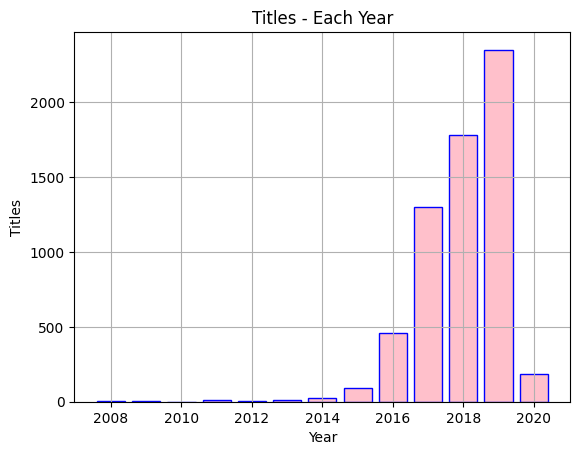

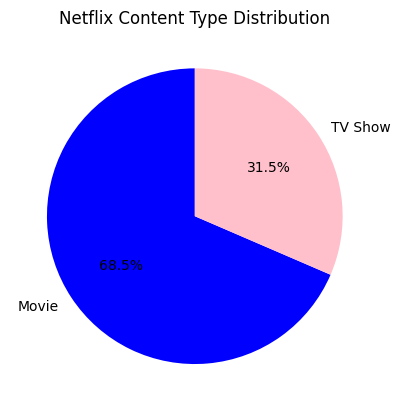

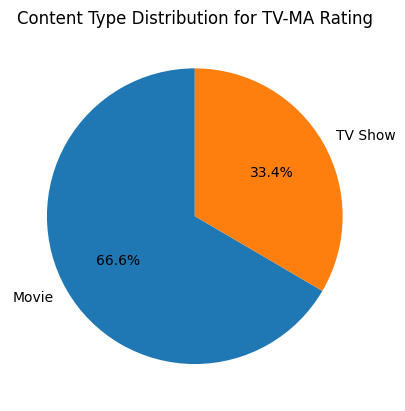

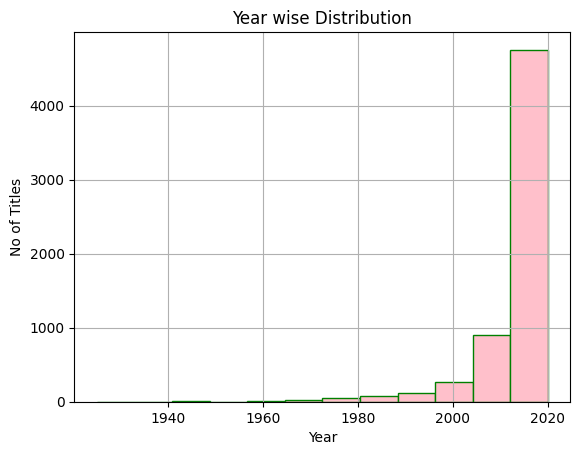

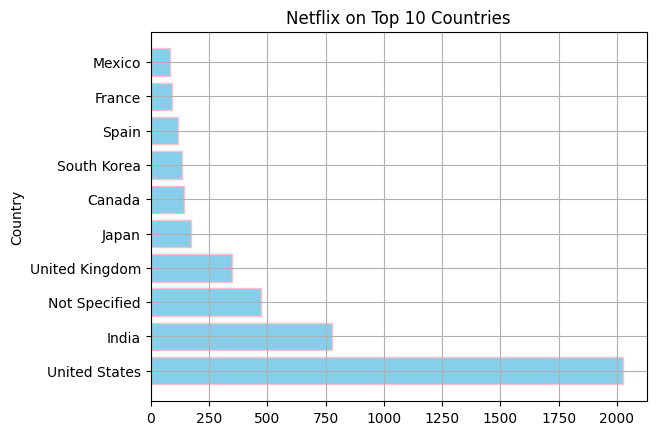

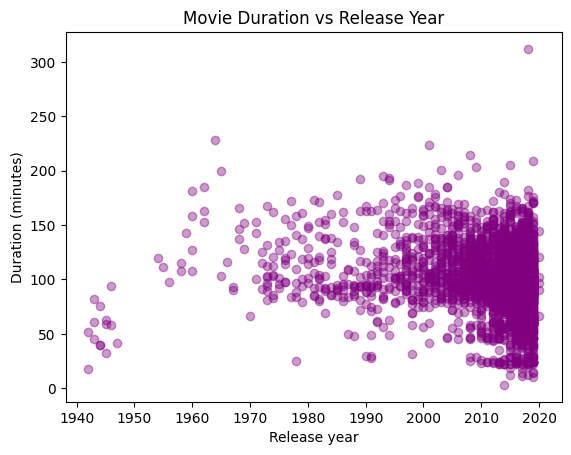

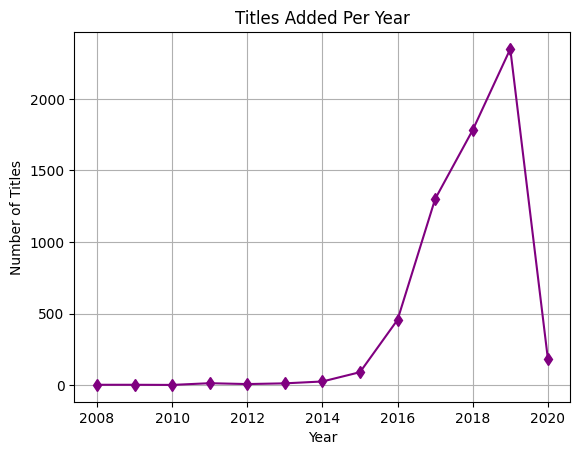

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/netflix_titles.csv")

# Basic data overview
print(df.shape)
print(df.columns)
print(df.info())
print(df.isnull().sum())

# Clean date_added column: strip spaces and convert to datetime
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'])

# Fill missing values in important columns
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Not Available")
df['country'] = df['country'].fillna("Not Specified")
df['rating'] = df['rating'].fillna("Not Rated")

# Drop rows with missing date_added as it is critical for time-based analysis
df = df.dropna(subset=['date_added'])

# Count titles by type (Movie or TV Show)
print(df.groupby('type')[['title']].count())

# Top countries producing content
print(df['country'].value_counts().head())

# Distribution of titles by release year
print(df.groupby('release_year')['title'].count().sort_index())

# Count of titles added by year and month
year_count = df.groupby(df['date_added'].dt.year)['title'].count()
print(year_count)
print(df.groupby(df['date_added'].dt.month)['title'].count())

# Top 10 genres/categories
print(df['listed_in'].value_counts().head(10))

# Top 10 directors
print(df['director'].value_counts().head(10))

# Rating distribution
print(df['rating'].value_counts())

# Explode cast column for detailed cast analysis
df['cast'] = df['cast'].str.split(', ')
df_exploded = df.explode('cast')
print(df_exploded['cast'].value_counts().head(10))

# Count type distribution within each rating
print(df.groupby('rating')['type'].value_counts().sort_values(ascending=False))

# Pivot table for ratings vs type counts
print(df.pivot_table(index='rating', columns='type', values='title', aggfunc='count'))

# Plot: Titles added per year (Bar chart)
plt.bar(year_count.index, year_count.values, color='pink', edgecolor='blue')
plt.title("Titles - Each Year")
plt.xlabel("Year")
plt.ylabel("Titles")
plt.grid(True)
plt.show()

# Plot: Content type distribution (Pie chart)
type_counts = df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'pink'])
plt.title('Netflix Content Type Distribution')
plt.show()

# Plot: Content type distribution for TV-MA rating (Pie chart)
subset = df[df['rating'] == 'TV-MA']['type'].value_counts()
plt.pie(subset, labels=subset.index, autopct='%1.1f%%', startangle=90)
plt.title('Content Type Distribution for TV-MA Rating')
plt.show()

# Plot: Distribution of release years (Histogram)
plt.hist(df['release_year'], bins=12, color='pink', edgecolor='green')
plt.title("Year wise Distribution")
plt.xlabel("Year")
plt.ylabel("No of Titles")
plt.grid(True)
plt.show()

# Plot: Top 10 countries by Netflix content (Horizontal bar chart)
top_10 = df['country'].value_counts().head(10)
plt.barh(top_10.index, top_10.values, color='skyblue', edgecolor='pink')
plt.title("Netflix on Top 10 Countries")
plt.ylabel("Country")
plt.grid(True)
plt.show()

# Extract numeric duration for movies only
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration_num'] = df_movies['duration'].str.extract('(\d+)').astype(int)

# Plot: Movie duration vs release year (Scatter plot)
plt.scatter(df_movies['release_year'], df_movies['duration_num'], alpha=0.4, color='purple')
plt.title("Movie Duration vs Release Year")
plt.xlabel("Release year")
plt.ylabel("Duration (minutes)")
plt.show()

# Plot: Titles added per year (Line chart)
plt.plot(year_count.index, year_count.values, marker='d', color='purple')
plt.title("Titles Added Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()